[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/Arrhenius_model/blob/master/Modelo_de_Arrhenius_ajuste_aos_pontos_experimentais.ipynb)

# Aula 02 de Processos Fermentativos - Ajustes não linear da dados experimentais de Arrhenius

In [0]:
# importando os pacotes do python
import numpy as np
from scipy.optimize import curve_fit
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

#carregar o arquivo em csv
uploaded = files.upload()

Saving Arrhenius.csv to Arrhenius.csv


In [5]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "Arrhenius.csv" com tamanho de 82 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['Arrhenius.csv'].decode('utf-8')))

In [7]:
#impressão do arquivo em data frame
calibracao_df

,Temperatura,k(T)
0,313,0.00043
1,319,0.00103
2,323,0.00180
3,328,0.00355
4,333,0.00717


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [9]:
#impressão do vetor
calibracao_np

array([[3.13e+02, 4.30e-04],
       [3.19e+02, 1.03e-03],
       [3.23e+02, 1.80e-03],
       [3.28e+02, 3.55e-03],
       [3.33e+02, 7.17e-03]])

In [10]:
#vetor do eixo x
x = calibracao_np[:,0]
print(x)

[313. 319. 323. 328. 333.]


In [11]:
#vetor do eixo y
y = calibracao_np[:,1]
print(y)

[0.00043 0.00103 0.0018  0.00355 0.00717]


In [0]:
# Definição do modelo
def func(x, A, E):
  R = 8.314 # constante dos gases em Joule/ (mol * K)
  return A * np.exp(-(E/(R*x))) 

In [0]:
# Chamada de curve_fit
popt, pcov = curve_fit(func, x, y, p0=(10000,10), maxfev=2000)  
p1, p2 = popt

In [14]:
# Impressão dos parâmetros ótimos
print("Optimal parameters are p1=%g, p2=%g" % (p1, p2))

Optimal parameters are p1=2.27066e+17, p2=124321


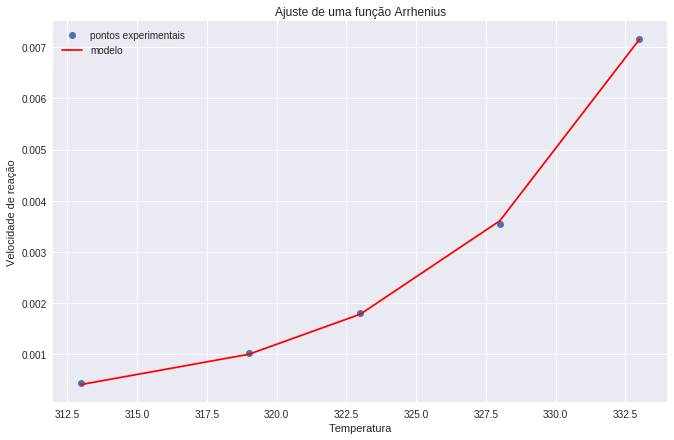

In [16]:
yfitted = func(x, *popt) 
#impressão dos dados experimentais e do modelo 
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, yfitted, "-r", label = "modelo")
plt.xlabel("Temperatura")
plt.ylabel("Velocidade de reação")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma função Arrhenius")
plt.legend()
plt.show()

In [17]:
r2 = 1. - sum((func(x, *popt) - y) ** 2) / sum((y - np.mean(y)) ** 2)
print(r2)

0.999808555152091


In [20]:
print(x, yfitted)

[313. 319. 323. 328. 333.] [0.0004058  0.00099667 0.00178098 0.003607   0.00715201]
